In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# -*- coding: utf-8 -*-
"""
Created on Tue May 14 10:20:16 2019
@author: Lab-CEPOF
"""
from __future__ import print_function
import pandas as pd
import xml.etree.ElementTree as et
from xml.etree.cElementTree import XMLParser
from lxml import objectify
import os
import numpy as np

base_dir ='/content/drive/My Drive/GoogleDrive20180110/DoutoradoUSP/DATA_Miriam'
os.chdir(base_dir)

a=os.listdir()

import scipy.io as spy

mat=spy.loadmat(a[8])


mdata = mat['papers']  # variable in mat file
mdtype = mdata.dtype  # dtypes of structures are "unsized objects"
# * SciPy reads in structures as structured NumPy arrays of dtype object
# * The size of the array is the size of the structure array, not the number
#   elements in any particular field. The shape defaults to 2-dimensional.
# * For convenience make a dictionary of the data using the names from dtypes
# * Since the structure has only one element, but is 2-D, index it at [0, 0]
ndata = {n: mdata[n][0, 0] for n in mdtype.names}


# Reconstruct the columns of the data table from just the time series
# Use the number of intervals to test if a field is a column or metadata
columns = [n for n, v in ndata.items()]

In [0]:
L=[[],[],[],[],[],[]]

for jj in range(np.shape(L)[0]):
    temp2=[]
    for ii in range(np.shape(mdata)[1]):
        try:
            temp=mdata.take(ii)[jj][0]
        except:
            temp=''
    
        temp2.append(str(temp))
    L[jj]=temp2

df=pd.DataFrame(L,columns)
df=df.T
#%% Limpando dataframe - só journal article
# Testando Pandas
"""
df=df.loc[df['ArticleType'].str.contains("Journal Article")]
df=df.loc[~df['ArticleType'].str.contains("Case")]
df=df.loc[~df['ArticleType'].str.contains("Comment")]
df=df.loc[~df['ArticleType'].str.contains("Review")]
df=df.loc[~df['ArticleType'].str.contains("Guideline")]
df=df.loc[df['PublicationType']=='PubmedArticle']

df=df.loc[~df['title'].str.contains("Review")]
df=df.loc[~df['title'].str.contains("pilot")]
df=df.loc[~df['title'].str.contains("in vivo")]
df=df.loc[~df['title'].str.contains("in vitro")]
df=df.loc[~df['title'].str.contains("ex vivo")]
df=df.loc[~df['title'].str.contains("mouse")]
df=df.loc[~df['title'].str.contains("mice")]
df=df.loc[~df['title'].str.contains("murine")]
df=df.loc[~df['title'].str.contains("cells")]
df=df.loc[~df['title'].str.contains("cell line")]
df=df.loc[~df['title'].str.contains("cell culture")]
df=df.loc[~df['title'].str.contains("commentary on")]
df=df.loc[~df['title'].str.contains("response to")]
df=df.loc[~df['title'].str.contains("retrospective")]
"""

df['KeyWords']=np.zeros(df.shape[0])
inde=df.loc[df['title'].str.contains("surgery")].index
df['KeyWords'][inde.values]=1
inde=df.loc[df['title'].str.contains("randomized")].index
df['KeyWords'][inde.values]=2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [0]:
df.head()

,title,abstract,PMID,ArticleType,PublicationType,citation,KeyWords
0,Biomarkers of basal cell carcinoma resistance ...,Methyl-aminolevulinate photodynamic therapy (M...,31017970,Journal Article,PubmedArticle,MedlineCitation,0.0
1,Photodynamic therapy: A targeted literature re...,Squamous cell carcinoma incidence is 65- to 25...,31012102,Journal ArticleReview,PubmedArticle,MedlineCitation,0.0
2,Single visit PDT for basal cell carcinoma - a ...,Non-melanoma skin cancer is the most prevalent...,31002888,Journal Article,PubmedArticle,MedlineCitation,0.0
3,Treatment of the facial basal cell carcinoma w...,Basal cell carcinoma (BCC) is the most common ...,30951626,"Journal ArticleResearch Support, Non-U.S. Gov't",PubmedArticle,MedlineCitation,0.0
4,TREATMENT OF SUPERFICIAL BASAL CELL CARCINOMA ...,There is limited literature on efficacy in 5-a...,30914392,Journal Article,PubmedArticle,MedlineCitation,0.0


In [0]:

#%% importa tudo
""" Agora começa a rede o tokizer"""

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence
import re

from nltk.corpus import stopwords
max_features=5000
max_sequence_length=500


def clean_str(string):
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)

    cleanr = re.compile('<.*?>')

    string = re.sub(r'\d+', '', string)
    string = re.sub(cleanr, '', string)
    string = re.sub("'", '', string)
    string = re.sub(r'\W+', ' ', string)
    string = string.replace('_', '')


    return string.strip().lower()




def prepare_data(data):    
    # data= pandas.DataFrame = df neste caso
    df['clean_abstract'] = df['abstract'].apply(lambda x: clean_str(x))

    
    stop_words = set(stopwords.words('english'))
    text = []
    for row in data['clean_abstract'].values:
        word_list = text_to_word_sequence(row)
        no_stop_words = [w for w in word_list if not w in stop_words]
        no_stop_words = " ".join(no_stop_words)
        text.append(no_stop_words)


    tk = Tokenizer(num_words=max_features, split=' ')

    tk.fit_on_texts(text)
    X = tk.texts_to_sequences(text)  
    
    X = pad_sequences(X, maxlen=max_sequence_length)
    #X = pad_sequences(X)

    word_index = tk.word_index
    Y = pd.get_dummies(data['KeyWords']).values
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 1000)

    return X_train, X_test, Y_train, Y_test, word_index, tk , text

Using TensorFlow backend.


In [0]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#%% tokenizer

X_train, X_test, Y_train, Y_test, word_index, tk, sentences = prepare_data(df)

# summarize what was learned
print('Word Counts:\n',tk.word_counts)
print('\n Document Counts:\n',tk.document_count)
print('\n Word Index:\n',tk.word_index)
print('\nWord Docs:\n',tk.word_docs)

vocab_size = len(tk.word_counts)+1
print('\n Vocabulary Size:\n',vocab_size)

Word Counts:
 OrderedDict([('methyl', 164), ('aminolevulinate', 109), ('photodynamic', 776), ('therapy', 991), ('mal', 407), ('pdt', 1891), ('excellent', 123), ('option', 97), ('treatment', 1454), ('basal', 855), ('cell', 1134), ('carcinoma', 737), ('bcc', 762), ('however', 148), ('cases', 166), ('resistant', 16), ('modality', 91), ('aim', 42), ('study', 369), ('identify', 11), ('potential', 82), ('biomarkers', 1), ('response', 292), ('clinical', 411), ('histological', 56), ('immunohistochemical', 10), ('p', 159), ('ki', 4), ('cd', 12), ('cox', 19), ('β', 10), ('catenin', 5), ('egfr', 3), ('survivin', 3), ('variables', 7), ('analyzed', 11), ('retrospective', 31), ('consecutive', 12), ('patients', 980), ('treated', 404), ('san', 1), ('jorge', 1), ('hospital', 21), ('huesca', 1), ('spain', 3), ('january', 22), ('december', 6), ('deepen', 1), ('markers', 15), ('effects', 140), ('cyclin', 2), ('expression', 43), ('vitro', 39), ('murine', 5), ('lines', 21), ('asz', 4), ('bsz', 4), ('also', 

In [0]:
########################################################################
modelkmeans = KMeans(n_clusters=10,max_iter=200)
kmeans=modelkmeans.fit(X_train)
from matplotlib import pyplot as plt
plt.hist(kmeans.labels_.tolist(),bins=10)
encoded_sentence_cluster=kmeans.cluster_centers_
sentence_cluster=tk.sequences_to_texts(encoded_sentence_cluster)
labels=kmeans.labels_
print(sentence_cluster[2])
print(sentence_cluster[7])

In [0]:

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
#from keras.datasets import imdb

# set parameters:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

#print('Loading data...')
#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)

print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, Y_test))


In [0]:


#%%
from keras.models import Model
from keras.layers import Input, Embedding, Reshape, dot, Dense
from keras.preprocessing import sequence
#from keras.optimizers import SGD, RMSprop, Adagrad
#from keras.utils import np_utils, generic_utils
#from keras.models import Sequential
X=np.vstack((X_train,X_test))
X=np.reshape(X,X.shape[0]*X.shape[1])

window_size = 3
vector_dim = 300
epochs = 100000

valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)

print('Valid Examples:\n',valid_examples)
print('X structure:\n', X[0])

Valid Examples:
 [37 54 46 71 61 12 95 91 58 29 62  9 42 45 21 65]
X structure:
 0


In [0]:

sampling_table = sequence.make_sampling_table(vocab_size)
couples, labels = sequence.skipgrams(X, vocab_size, window_size=window_size, sampling_table=sampling_table)
word_target, word_context = zip(*couples)
word_target = np.array(word_target, dtype="int32")
word_context = np.array(word_context, dtype="int32")

print(couples[:10], labels[:10])

[[1582, 2], [215, 2444], [3370, 65], [364, 2584], [192, 406], [2521, 58], [75, 201], [782, 5534], [2506, 980], [727, 126]] [1, 1, 1, 0, 0, 1, 1, 0, 1, 1]


In [0]:
#Creating the SKipgram Model

In [0]:
# create some input variables
input_target = Input((1,))
input_context = Input((1,))

embedding = Embedding(vocab_size, vector_dim, input_length=1, name='embedding')


target = embedding(input_target)
target = Reshape((vector_dim, 1))(target)
context = embedding(input_context)
context = Reshape((vector_dim, 1))(context)

# setup a cosine similarity operation which will be output in a secondary model
similarity= dot([target, context],axes=1,normalize=False)
#similarity = merge([target, context], mode='dot', dot_axes=0)



# now perform the dot product operation to get a similarity measure
dot_product= dot([target, context],axes=1,normalize=False)
#dot_product = merge([target, context], mode='dot', dot_axes=1)
dot_product = Reshape((1,))(dot_product)
# add the sigmoid output layer
output = Dense(1, activation='sigmoid')(dot_product)

# create the primary training model
model = Model(input=[input_target, input_context], output=output)
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

# create a secondary validation model to run our similarity checks during training
validation_model = Model(input=[input_target, input_context], output=similarity)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("do...)`


In [0]:
model.summary()

In [0]:
validation_model.summary()

In [0]:
class SimilarityCallback:
    def run_sim(self):
        for i in range(valid_size):
          word_index=tk.word_index
          for word, word_ind in word_index.items():
            if word_ind==valid_examples[i]:
              valid_word = word
              top_k = 8  # number of nearest neighbors
              sim = self._get_sim(valid_examples[i])
              nearest = (-sim).argsort()[1:top_k + 1]
              log_str = 'Nearest to %s:' % valid_word
              for k in range(top_k):
                for word, word_ind in word_index.items():
                  if word_ind==nearest[k]:
                    close_word = word
                    log_str = '%s %s,' % (log_str, close_word)
              print(log_str)

    @staticmethod
    def _get_sim(valid_word_idx):
        sim = np.zeros((vocab_size,))
        in_arr1 = np.zeros((1,))
        in_arr2 = np.zeros((1,))
        for i in range(vocab_size):
            in_arr1[0,] = valid_word_idx
            in_arr2[0,] = i
            out = validation_model.predict_on_batch([in_arr1, in_arr2])
            sim[i] = out
        return sim

In [0]:
sim_cb=SimilarityCallback()

arr_1 = np.zeros((1,))
arr_2 = np.zeros((1,))
arr_3 = np.zeros((1,))
loss2 = np.zeros((epochs,))
for cnt in range(epochs):
    idx = np.random.randint(0, len(labels)-1)
    arr_1[0,] = word_target[idx]
    arr_2[0,] = word_context[idx]
    arr_3[0,] = labels[idx]
    loss = model.train_on_batch([arr_1, arr_2], arr_3)
    loss2[cnt]=loss
#    if i % 100 == 0:
    if cnt % 100000 == 0:
    #if cnt % 2 == 0:
      print("Iteration {}, loss={}".format(cnt, loss))
      sim_cb.run_sim()

Iteration 0, loss=0.6788191199302673
Nearest to cosmetic: certainly, ranging, hypoxic, distinguished, α, syndrome, undergo, invokes,
Nearest to risk: portable, photodyn, majority, pdl, reassignment, cut, presentations, poorer,
Nearest to effective: seem, program, gskβ, wedel, ozone, diameter, recalcitrant, predictions,
Nearest to outcome: cost, chemoimmunotherapy, extrapolated, needle, without, origination, screened, predisposes,
Nearest to compared: nmscs, degree, solutions, extends, evidenced, france, known, oled,
Nearest to ala: promising, demonstrating, intralesional, psoralen, retinoids, localization, remote, sufficient,
Nearest to observed: set, excited, seem, incremental, exogeneous, environments, discussed, probabilities,
Nearest to new: unlike, subcommittee, audit, dimethylsulphoxide, bi, eradicated, debulking, inconvenient,
Nearest to ppix: consequently, enabling, posas, treat, nmscs, per, deliverable, subgroup,
Nearest to non: curettage, influencing, histological, activity, 

In [0]:
sim_cb.run_sim()

Nearest to cosmetic: cosmetic, pdt, lesions, patients, therapy, cell, excellent, bcc,
Nearest to risk: pdt, treatment, patients, cell, carcinoma, basal, lesions, skin,
Nearest to effective: pdt, effective, therapy, lesions, patients, cell, ala, photodynamic,
Nearest to outcome: outcome, pdt, excellent, cosmetic, patients, lesions, bcc, cell,
Nearest to compared: pdt, patients, cell, treatment, basal, bcc, therapy, ala,
Nearest to ala: pdt, treatment, skin, therapy, patients, lesions, photodynamic, acid,
Nearest to observed: pdt, observed, therapy, lesions, skin, patients, bcc, cell,
Nearest to new: treatment, patients, pdt, therapy, bcc, ala, photodynamic, skin,
Nearest to ppix: fluorescence, treatment, pdt, skin, ala, lesions, patients, light,
Nearest to non: treatment, skin, pdt, patients, cancer, melanoma, lesions, bcc,
Nearest to use: pdt, treatment, patients, therapy, skin, photodynamic, ala, cell,
Nearest to bcc: treatment, pdt, patients, cell, skin, therapy, lesions, photodynami

In [0]:
print(np.min(loss2))
print(np.mean(loss2))
loss2

1.192093321833454e-07
0.5436161592137504


array([0.67881912, 0.6909973 , 0.70805234, ..., 0.0059519 , 0.10519096,
       0.37940252])

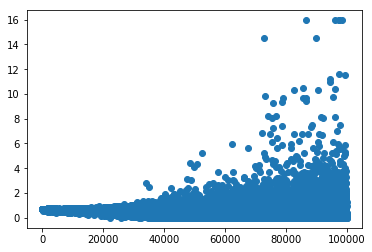

In [0]:
import matplotlib.pyplot as plt
Iteraction=np.zeros((epochs,))
for ii in range(epochs):
  Iteraction[ii]=ii
plt.scatter(Iteraction,loss2)

In [0]:
print(loss2[100000-20:])


[1.16018966e-01 3.90958823e-02 4.96193826e-01 1.13947259e-03
 3.21038254e-02 5.19710898e-01 1.58350304e-01 7.74688125e-02
 1.52475480e-02 1.74443070e-02 4.91893897e-03 2.19003651e-02
 9.71465051e-01 1.30859947e+00 2.96866670e-02 3.76941115e-01
 6.14206716e-02 5.95190190e-03 1.05190955e-01 3.79402518e-01]


In [0]:
embedding_matrix=model.get_weights()[0]

In [0]:

#%% após ter os pesos dos embeddings
valid_size = 16  # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
# input words - in this case we do sample by sample evaluations of the similarity
valid_word = Input((1,), dtype='int32')
other_word = Input((1,), dtype='int32')
# setup the embedding layer
embeddings = Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
                      weights=[embedding_matrix])
embedded_a = embeddings(valid_word)
embedded_b = embeddings(other_word)
similarity= dot([embedded_a, embedded_b],axes=2,normalize=False)
#similarity = merge([embedded_a, embedded_b], mode='cos', dot_axes=2)
# create the Keras model
k_model = Model(input=[valid_word, other_word], output=similarity)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("do...)`
  from ipykernel import kernelapp as app


In [0]:

def get_sim(valid_word_idx, vocab_size):
    sim = np.zeros((vocab_size,))
    in_arr1 = np.zeros((1,))
    in_arr2 = np.zeros((1,))
    in_arr1[0,] = valid_word_idx
    for i in range(vocab_size):
        in_arr2[0,] = i
        out = k_model.predict_on_batch([in_arr1, in_arr2])
        sim[i] = out
    return sim


In [0]:

"""# now run the model and get the closest words to the valid examples
for i in range(valid_size):
    valid_word = wv.index2word[valid_examples[i]]
    top_k = 8  # number of nearest neighbors
    sim = get_sim(valid_examples[i], len(wv.vocab))
    nearest = (-sim).argsort()[1:top_k + 1]
    log_str = 'Nearest to %s:' % valid_word
    for k in range(top_k):
        close_word = wv.index2word[nearest[k]]
        log_str = '%s %s,' % (log_str, close_word)
    print(log_str)

        #%%

#encoded_docs = tk.texts_to_matrix(sentences, mode='count')
#print(encoded_docs)
"""

In [0]:

for i in range(valid_size):
          word_index=tk.word_index
          for word, word_ind in word_index.items():
            if word_ind==valid_examples[i]:
              valid_word = word
              top_k = 8  # number of nearest neighbors
              sim = get_sim(valid_examples[i],vocab_size)
              nearest = (-sim).argsort()[1:top_k + 1]
              log_str = 'Nearest to %s:' % valid_word
              for k in range(top_k):
                for word, word_ind in word_index.items():
                  if word_ind==nearest[k]:
                    close_word = word
                    log_str = '%s %s,' % (log_str, close_word)
              print(log_str)


Nearest to three: treatment, cell, patients, lesions, basal, pdt, skin, bcc,
Nearest to group: pdt, patients, skin, treatment, complete, therapy, tumors, cell,
Nearest to squamous: carcinoma, squamous, basal, patients, lesions, bcc, treatment, pdt,
Nearest to cancers: skin, cancers, patients, pdt, therapy, cell, nonmelanoma, ala,
Nearest to surgery: treatment, pdt, therapy, cell, bcc, lesions, surgical, skin,
Nearest to disease: cell, treatment, carcinoma, bowen, patients, lesions, pdt, actinic,
Nearest to tumors: treatment, pdt, patients, skin, cell, lesions, ala, excellent,
Nearest to carcinoma: cell, patients, basal, treatment, pdt, lesions, bcc, therapy,
Nearest to methyl: methyl, therapy, mal, photodynamic, treatment, acid, ala, ester,
Nearest to therapeutic: therapeutic, patients, pdt, cell, lesions, skin, bcc, therapy,
Nearest to pain: pdt, treatment, patients, bcc, cell, skin, treated, light,
Nearest to lesion: treatment, pdt, lesions, patients, bcc, cell, therapy, skin,
Neares